In [1]:
import pandas as pd

In [2]:
com2 = pd.read_csv('artist_m_extracted.csv')
com2.shape

(8272, 23)

In [3]:
com4 = com2.copy()

In [4]:
com4.lyricist_m = com4.lyricist_m.str.replace("'", '', regex=False).str.replace("[", '', regex=False).str.replace("]", '', regex=False)
com4.composer_m = com4.composer_m.str.replace("'", '', regex=False).str.replace("[", '', regex=False).str.replace("]", '', regex=False)
com4.arranger_m = com4.arranger_m.str.replace("'", '', regex=False).str.replace("[", '', regex=False).str.replace("]", '', regex=False)

In [5]:
# 작곡 여부만 판단하는 데이터프레임 뽑기. 멤버가 참여하지 않은 곡은 모두 제외.
compose = com4[(com4['composer_m'].str.len() != 0)]
compose = compose[compose.composer_m.notnull()]
compose.tail()

,Unnamed: 0,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,...,gender,idol_id,agency_old,agency_new,debut_y,debut_t,fan,lyricist_m,composer_m,arranger_m
8261,8261,히스토리,HIM,2016.04.11,Dance,타이틀 곡,"1,540",장이정 (JANGYIJEONG) 작사 김시형 작사 장이정 (JANGY...,Don't touch it We love it<br>She's dancing on ...,"장이정,김시형",...,남,721703,NaN,로엔,2013.0,Dreamer (Narr. 아이유),2956,"장이정, 김시형",장이정,
8262,8262,히스토리,HIM,2016.04.11,Dance,수록곡,315,장이정 (JANGYIJEONG) 작사 송경일 작사 장이정 (JANGY...,우리 사이 오랜 시간이 지났지<br>왜 아직도 니 생각이 나는지<br>찬바람 부는 ...,"장이정,송경일",...,남,721703,NaN,로엔,2013.0,Dreamer (Narr. 아이유),2956,"장이정, 송경일","장이정, 송경일",
8263,8263,히스토리,HIM,2016.04.11,Ballad,수록곡,290,나도균 작사 김태영 작사 나도균 작곡 김태영 작곡 김태...,오늘도 많이 힘들었죠<br>애써 웃으려 노력하지 마요<br>바쁜 일상에 외로울 때도...,"나도균,김태영",...,남,721703,NaN,로엔,2013.0,Dreamer (Narr. 아이유),2956,나도균,나도균,
8264,8264,히스토리,HIM,2016.04.11,Dance,수록곡,248,장이정 (JANGYIJEONG) 작사 장이정 (JANGYIJEONG) 작...,WE'RE LOST<br>WE'RE LOST<br>IN THE NIGHT<br>우리...,장이정,...,남,721703,NaN,로엔,2013.0,Dreamer (Narr. 아이유),2956,장이정,장이정,장이정
8265,8265,히스토리,HIM,2016.04.11,Dance,수록곡,253,장이정 (JANGYIJEONG) 작사 김재호 작사 김시형 작사 ...,매섭게 불어대던 바람이 다 지나면<br>어느새 멀리 흩어져버린 너의 조각<br>돌아...,"장이정,김재호,김시형",...,남,721703,NaN,로엔,2013.0,Dreamer (Narr. 아이유),2956,"장이정, 김재호, 김시형","장이정, 김재호",


In [6]:
len(compose)

1501

In [7]:
compose.gender.value_counts()

남    1338
여     142
혼      21
Name: gender, dtype: int64

In [8]:
# 작사 여부만 판단하는 데이터프레임 뽑기. 멤버가 참여하지 않은 곡은 모두 제외.
# com4['lyricist_m'] = com4['lyricist_m'].str.replace("'", "", regex=False)
lyricist = com4[(com4['lyricist_m'].str.len() != 0)]
lyricist = lyricist[lyricist.lyricist_m.notnull()]
lyricist[lyricist.artist == '레드벨벳']

,Unnamed: 0,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,...,gender,idol_id,agency_old,agency_new,debut_y,debut_t,fan,lyricist_m,composer_m,arranger_m


In [9]:
len(lyricist)

2462

In [10]:
lyricist.gender.value_counts()

남    1978
여     434
혼      50
Name: gender, dtype: int64

In [11]:
# 편곡 여부만 판단하는 데이터프레임 뽑기. 멤버가 참여하지 않은 곡은 모두 제외.
arrange = com4[(com4['arranger_m'].str.len() != 0)]
arrange = arrange[arrange.arranger_m.notnull()]
arrange.head()

,Unnamed: 0,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,...,gender,idol_id,agency_old,agency_new,debut_y,debut_t,fan,lyricist_m,composer_m,arranger_m
0,0,(여자)아이들,I am,2018.05.02,Dance,타이틀 곡,"85,374",소연 작사 소연 작곡 빅싼초 (Yummy Tone) 작곡 빅싼...,기나긴 너와 이 밤을<br>너와 이렇게 너와<br>기다린 너와 시간을<br>너와 이...,소연,...,여,2137482,NaN,큐브,2018.0,NaN,16884,소연,소연,소연
8,8,(여자)아이들,한(一),2018.08.14,Dance,타이틀 곡,"61,380",소연 작사 소연 작곡 빅싼초 (Yummy Tone) 작곡 빅싼...,Do you remember you remember<br>remember what ...,소연,...,여,2137482,NaN,큐브,2018.0,NaN,16884,소연,소연,소연
32,32,god,Chapter 2,1999.11.25,Dance,수록곡,"1,392","god 작사 josephhung bui, 박진영, 박준형 작곡 jos...",우리가 여기까지 온 건다 그 때 우리<br>힘들었던 그 때가 있기 때문이지<br>우...,god,...,남,100007,NaN,iHQ싸이더스),1999.0,어머님께,49794,,박준형,박준형
73,73,god,Chapter 5 Letter,2002.12.27,Ballad,인기 곡,"2,878","김태우 작사 김태우 작곡 김태우, 이현승 편곡",나에게 사랑이란 관심조차<br>없는걸요<br>쓸데없는 고민과 괜한 시간<br>낭비일...,김태우,...,남,100007,NaN,iHQ싸이더스),1999.0,어머님께,49794,김태우,김태우,김태우
76,76,god,Chapter 5 Letter,2002.12.27,Ballad,수록곡,"1,729","손호영 작사 손호영 작곡 김순인, 손호영 편곡",얘들아 우리 다같이<br>이 세상에 힘들어하는 모든 사람들을 위해서<br>힘차게 노...,손호영,...,남,100007,NaN,iHQ싸이더스),1999.0,어머님께,49794,손호영,손호영,손호영


In [12]:
len(arrange)

575

In [13]:
arrange.gender.value_counts()

남    537
여     31
혼      7
Name: gender, dtype: int64

In [14]:
arrange[arrange.gender == '남']

,Unnamed: 0,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,...,gender,idol_id,agency_old,agency_new,debut_y,debut_t,fan,lyricist_m,composer_m,arranger_m
32,32,god,Chapter 2,1999.11.25,Dance,수록곡,"1,392","god 작사 josephhung bui, 박진영, 박준형 작곡 jos...",우리가 여기까지 온 건다 그 때 우리<br>힘들었던 그 때가 있기 때문이지<br>우...,god,...,남,100007,NaN,iHQ싸이더스),1999.0,어머님께,49794,,박준형,박준형
73,73,god,Chapter 5 Letter,2002.12.27,Ballad,인기 곡,"2,878","김태우 작사 김태우 작곡 김태우, 이현승 편곡",나에게 사랑이란 관심조차<br>없는걸요<br>쓸데없는 고민과 괜한 시간<br>낭비일...,김태우,...,남,100007,NaN,iHQ싸이더스),1999.0,어머님께,49794,김태우,김태우,김태우
76,76,god,Chapter 5 Letter,2002.12.27,Ballad,수록곡,"1,729","손호영 작사 손호영 작곡 김순인, 손호영 편곡",얘들아 우리 다같이<br>이 세상에 힘들어하는 모든 사람들을 위해서<br>힘차게 노...,손호영,...,남,100007,NaN,iHQ싸이더스),1999.0,어머님께,49794,손호영,손호영,손호영
82,82,god,보통날,2004.12.08,Ballad,수록곡,"1,948",박진영 작사 박진영 작곡 데니안 작곡 데니안 편곡,yeah I don't know why<br>but<br>there's someth...,박진영,...,남,100007,NaN,iHQ싸이더스),1999.0,어머님께,49794,,데니안,데니안
119,119,갓세븐,GOT7 미니앨범 1집 `Got it?`,2014.01.20,Rap / Hip-hop,타이틀 곡,"24,836",박진영 작사 박진영 작곡 박진영 편곡 홍지상 편곡,노력하지 않아도 왜 그런지 몰라<br>나만 보면 자지러져 놀라 내<br>Look<b...,박진영,...,남,751059,NaN,JYP,2014.0,Girls Girls Girls,75684,진영,진영,진영
121,121,갓세븐,GOT7 미니앨범 1집 `Got it?`,2014.01.20,Rap / Hip-hop,수록곡,"14,993",박진영 작사 박진영 작곡 박진영 편곡 홍지상 편곡,자 내 말 잘 들어 난 니가 좋아<br>너의 아담한 키와 작고<br>오똑한 코와 앵...,박진영,...,남,751059,NaN,JYP,2014.0,Girls Girls Girls,75684,진영,진영,진영
130,130,갓세븐,Identify,2014.11.18,Rap / Hip-hop,타이틀 곡,"25,501",박진영 작사 박진영 작곡 박진영 편곡 홍지상 편곡,하지마 하지 하지 하지 하지마<br>니가 그럴 때마다 미칠 것 같아<br>내 눈을 ...,박진영,...,남,751059,NaN,JYP,2014.0,Girls Girls Girls,75684,진영,진영,진영
146,146,갓세븐,MAD,2015.09.29,Dance,수록곡,"8,099",박진영 작사 Dr.JO 작사 박진영 작곡 Dr.JO 작곡 ...,거기 손 들어 들어 손들어 들어<br>Put’em up put’em up<br>꼼짝...,"박진영,Dr.JO",...,남,751059,NaN,JYP,2014.0,Girls Girls Girls,75684,진영,진영,진영
151,151,갓세븐,MAD Winter Edition,2015.11.23,R&B / Soul,타이틀 곡,"20,531",박진영 작사 크루셜스타 (Crucial Star) 작사 잭슨 (GOT...,수백 번 성공한적 없는 고백<br>자신감이 없는 나<br>Should I just ...,"박진영,크루셜스타,잭슨",...,남,751059,NaN,JYP,2014.0,Girls Girls Girls,75684,"진영, 잭슨",진영,진영
192,192,갓세븐,Eyes On You,2018.03.12,Dance,수록곡,"19,588",이하진 작사 뱀뱀 (GOT7) 작사 이미지스 (IMAGES) 작곡...,다른 공간 같은 하늘 아래<br>마주쳤던 우리<br>알 수 없는 공기<br>가득 채...,"이하진,뱀뱀",...,남,751059,NaN,JYP,2014.0,Girls Girls Girls,75684,뱀뱀,뱀뱀,뱀뱀


In [15]:
# 작사작곡편곡 여부를 시계열로 보기. 우선 발매날짜를 년도만 남겨야 한다. 

def leave_four(df):
    df.release_date = df.release_date.astype(str)
    df.release_date = df.release_date.str.replace('.', '', regex=False)
    df.release_date = df['release_date'].str[:4]
    df = df[df.release_date.notnull()]
    
leave_four(lyricist)
leave_four(compose)
leave_four(arrange)

In [16]:
l_time = pd.DataFrame(lyricist.groupby(['gender', 'release_date']).count()).lyricist_m
l_time

gender  release_date
남       -                 3
        1992              9
        1993             28
        1994             13
        1995             30
        1996             19
        1997             13
        1998             27
        1999             32
        2000             26
        2001             35
        2002             16
        2003             43
        2004             20
        2005             21
        2006             16
        2007             17
        2008             28
        2009             20
        2010             35
        2011             70
        2012             95
        2013            124
        2014            185
        2015            208
        2016            264
        2017            318
        2018            263
여       1998              3
        1999              1
        2000              3
        2001             11
        2002             10
        2003              2
        2005              2

In [17]:
c_time = pd.DataFrame(compose.groupby(['gender', 'release_date']).count()).lyricist_m
c_time

gender  release_date
남       -                 2
        1992              9
        1993             35
        1994             13
        1995             27
        1996             28
        1997             24
        1998             24
        1999             37
        2000             22
        2001             23
        2002             13
        2003             33
        2004             14
        2005             27
        2006             13
        2007             11
        2008             17
        2009             13
        2010             23
        2011             45
        2012             48
        2013             79
        2014            111
        2015            143
        2016            157
        2017            172
        2018            171
여       1999              1
        2007              1
        2008              1
        2009              2
        2011              4
        2012             11
        2013              9

In [18]:
# 2014~2015년에 포풍증가. 왜? 누구일까?
compose[compose.release_date == '2018'].groupby(['gender', 'artist']).count().composer_m

gender  artist    
남       갓세븐            9
        뉴이스트 W         5
        데이식스           7
        레인즈            1
        마이틴            1
        몬스타엑스          2
        미스터미스터         1
        방탄소년단         21
        보이프렌드          1
        블락비            1
        블락비 바스타즈       1
        비오케이           1
        비투비            6
        비투비-블루         1
        빅뱅             1
        빅스             7
        세븐틴           10
        솔리드            5
        슈퍼 주니어-디앤이     4
        슈퍼주니어          2
        스트레이 키즈       20
        씨엔블루           1
        아이콘           18
        에스에프나인         1
        에프티 아일랜드       3
        엔플라잉           1
        오션             2
        위너            12
        유앤비            4
        이엑스피에디션        2
        인피니트           1
        테이크            1
        투포케이           2
        트랙스            1
        틴탑             2
        파란             1
        펜타곤           10
        허니스트           2
여       (여자)아이들        2
      

In [19]:
a_time = pd.DataFrame(arrange.groupby(['gender', 'release_date']).count()).lyricist_m
a_time

gender  release_date
남       1992             9
        1993            27
        1994            13
        1995            27
        1996            27
        1997            21
        1998            21
        1999            27
        2000            19
        2001            14
        2002            10
        2003            13
        2004             1
        2005            22
        2006             7
        2008             4
        2009             4
        2010             7
        2011             4
        2012            10
        2013            32
        2014            43
        2015            51
        2016            48
        2017            41
        2018            31
여       2012             3
        2013             2
        2015            15
        2016             4
        2017             2
        2018             5
혼       1996             1
        1997             4
        1999             1
        2017             1
Name: l

### 참여도 순위 보기

In [20]:
# 멤버가 작사에 참여한 곡 수 top 20. 
test = pd.DataFrame(lyricist.groupby(['gender', 'artist']).lyricist_m.count().sort_values(ascending=False))
test.head(20)

lyricist_m
gender artist                
남      방탄소년단               99
       비에이피                70
       빅뱅                  68
       비투비                 66
       빅스                  62
       씨엔블루                62
       세븐틴                 59
       비원에이포               58
       에프티 아일랜드            57
       갓세븐                 52
       신화                  52
       몬스타엑스               51
       언타이틀                46
       비스트                 45
       에이치오티               43
       듀스                  41
       데이식스                38
       블락비                 37
여      브라운 아이드 걸스          33
       마마무                 33

In [21]:
# 멤버가 작곡에 참여한 곡 수 top 20. 
test = pd.DataFrame(compose.groupby(['gender', 'artist']).composer_m.count().sort_values(ascending=False))
test.head(20)

composer_m
gender artist              
남      방탄소년단             97
       씨엔블루              65
       빅뱅                57
       에프티 아일랜드          51
       세븐틴               50
       언타이틀              47
       비원에이포             45
       갓세븐               45
       솔리드               43
       에이치오티             42
       듀스                41
       데이식스              38
       서태지와 아이들          35
       비투비               34
       신화                31
       아이콘               29
       구피                29
       블락비               27
       비스트               25
여      이엑스아이디            24

In [22]:
# 멤버가 편곡에 참여한 곡 수 top 20. 
test = pd.DataFrame(arrange.groupby(['gender', 'artist']).arranger_m.count().sort_values(ascending=False))
test.head(20)

arranger_m
gender artist              
남      언타이틀              46
       에이치오티             42
       듀스                41
       서태지와 아이들          35
       솔리드               34
       구피                25
       비원에이포             25
       비투비               22
       신화                21
       씨엔블루              21
       비스트               18
       원타임               18
       블락비               15
       투포케이              12
       비에이피              11
       엠아이비              10
여      원더걸스               9
남      몬스타엑스              8
       빅스                 8
       방탄소년단              7

### 방탄소년단~

In [23]:
btsl = lyricist[lyricist.artist == '방탄소년단']

In [24]:
artist_info = pd.read_csv('C:/Users/pje17/Desktop/Lyricsis/M5_Idol_lyrics/Data/Data20180921/artist_info_combined_ver04.csv', encoding='euc-kr')
artist_info.head()

,artist,artist_m,gender,idol_id,agency_old,agency_new,debut_y,debut_t,fan
0,서태지와 아이들,"서태지, 양현석, 이주노",남,100161,NaN,요요기획,1992.0,난 알아요,4893
1,더 블루,"손지창, 김민종",남,180144,NaN,SM,1992.0,너만을 느끼며,474
2,잼,NaN,혼,225786,NaN,DSP미디어,NaN,NaN,19
3,에스오에스,NaN,여,101645,NaN,삼포니레코드,NaN,NaN,39
4,솔리드,"이준, 정재윤, 김조한",남,100037,NaN,비앤비,1993.0,이젠 나를 (Give Me A Chance),1772


In [25]:
artist_info['artist_m'] = artist_info['artist_m'].str.replace(' ', '').str.replace(r'\(.*?\)','').str.replace(')', '', regex=False).str.split(',')

In [26]:
artist_info[artist_info.artist=='방탄소년단'].artist_m

197    [RM, SUGA, 진, j-hope, 지민, V, 정국]
Name: artist_m, dtype: object

In [27]:
bts_mem = artist_info[artist_info.artist=='방탄소년단'].artist_m

In [28]:
bts_mem.str[1]

197    SUGA
Name: artist_m, dtype: object

In [29]:
btsl

,Unnamed: 0,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,...,gender,idol_id,agency_old,agency_new,debut_y,debut_t,fan,lyricist_m,composer_m,arranger_m
1665,1665,방탄소년단,2 COOL 4 SKOOL,2013,Rap / Hip-hop,수록곡,"49,248",신동혁 작사 THE RAP MONSTER 작사 방시혁 작사 S...,What 이리 내놔<br>What 긴장해 다<br>What 끝판대장<br>What ...,"신동혁,THERAPMONSTER,방시혁,SUGA,Pdogg",...,남,672375,NaN,빅히트,2013.0,No More Dream,518210,SUGA,SUGA,NaN
1667,1667,방탄소년단,2 COOL 4 SKOOL,2013,Rap / Hip-hop,타이틀 곡,"62,312",Supreme Boi 작사 THE RAP MONSTER 작사 j-ho...,얌마 니 꿈은 뭐니<br>얌마 니 꿈은 뭐니<br>얌마 니 꿈은 뭐니<br>니 꿈은...,"SupremeBoi,THERAPMONSTER,j-hope,SUGA,방시혁,Pdogg",...,남,672375,NaN,빅히트,2013.0,No More Dream,518210,"j-hope, SUGA","j-hope, SUGA",NaN
1668,1668,방탄소년단,2 COOL 4 SKOOL,2013,Ballad,수록곡,"81,353",Slow Rabbit 작사 THE RAP MONSTER 작사 j-ho...,Wanna be loved<br>Don't wanna be fool wanna<br...,"SlowRabbit,THERAPMONSTER,j-hope,SUGA",...,남,672375,NaN,빅히트,2013.0,No More Dream,518210,"j-hope, SUGA","j-hope, SUGA",NaN
1669,1669,방탄소년단,2 COOL 4 SKOOL,2013,Rap / Hip-hop,수록곡,"38,824",THE RAP MONSTER 작사 j-hope 작사 SUGA 작사...,내 이름은 SUGA<br>다른 래퍼들은 전부 내 뒤에<br>오늘도 쌔끈한 이 비트 ...,"THERAPMONSTER,j-hope,SUGA,V,지민,정국,진",...,남,672375,NaN,빅히트,2013.0,No More Dream,518210,"j-hope, SUGA, V, 지민, 정국, 진",,NaN
1670,1670,방탄소년단,"O!RUL8,2?",2013,Rap / Hip-hop,수록곡,"36,444",RM 작사 Pdogg 작사 RM 작곡 Pdogg 작곡,Nothing lasts forever<br>You only live once<br...,"RM,Pdogg",...,남,672375,NaN,빅히트,2013.0,No More Dream,518210,RM,RM,NaN
1671,1671,방탄소년단,"O!RUL8,2?",2013,Rap / Hip-hop,타이틀 곡,"55,440",Supreme Boi 작사 RM 작사 SUGA 작사 방시혁 ...,좋은 집 좋은 집 좋은 차 좋은 차<br>그런 게 행복일 수 있을까<br>In Se...,"SupremeBoi,RM,SUGA,방시혁,Pdogg",...,남,672375,NaN,빅히트,2013.0,No More Dream,518210,"RM, SUGA","RM, SUGA",NaN
1672,1672,방탄소년단,"O!RUL8,2?",2013,Rap / Hip-hop,수록곡,"43,042",RM 작사 j-hope 작사 SUGA 작사 Pdogg 작사...,Whatever they say<br>Im here for my muzik<br>h...,"RM,j-hope,SUGA,Pdogg",...,남,672375,NaN,빅히트,2013.0,No More Dream,518210,"RM, j-hope, SUGA","RM, j-hope, SUGA",NaN
1674,1674,방탄소년단,"O!RUL8,2?",2013,Rap / Hip-hop,수록곡,"42,201",RM 작사 j-hope 작사 SUGA 작사 Pdogg 작사...,If I ruled the world I'd do it all<br>Westside...,"RM,j-hope,SUGA,Pdogg",...,남,672375,NaN,빅히트,2013.0,No More Dream,518210,"RM, j-hope, SUGA","RM, j-hope, SUGA",NaN
1675,1675,방탄소년단,"O!RUL8,2?",2013,Rap / Hip-hop,수록곡,"61,045",Slow Rabbit 작사 RM 작사 j-hope 작사 SUG...,baby baby 그대는<br>Caramel Macchiato<br>여전히 내 입가...,"SlowRabbit,RM,j-hope,SUGA,Pdogg,권순일,박용인,최재만,조현아",...,남,672375,NaN,빅히트,2013.0,No More Dream,518210,"RM, j-hope, SUGA","RM, j-hope, SUGA",NaN
1676,1676,방탄소년단,"O!RUL8,2?",2013,Rap / Hip-hop,수록곡,"42,319",Supreme Boi 작사 RM 작사 j-hope 작사 SUG...,"Damn 힙부심, 아이돌 랩퍼? Cut that 불씨<br>어차피 본질은 아이돌 쉿...","SupremeBoi,RM,j-hope,SUGA",...,남,672375,NaN,빅히트,2013.0,No More Dream,518210,"RM, j-hope, SUGA","RM, j-hope, SUGA",NaN


In [30]:
len(btsl[btsl.lyricist_m.str.contains('j-hope')])

68

In [31]:
bts_members = ['RM', 'SUGA', '진', 'j-hope', '지민', 'V', '정국']

In [32]:
for members in bts_members:
    num = len(btsl[btsl.composer_m.str.contains(members)])
    print(members, num)

RM 85
SUGA 72
진 5
j-hope 66
지민 2
V 5
정국 4


In [33]:
l_count = []
c_count = []
a_count = []

for members in bts_members:
    l_count.append(len(btsl[btsl.lyricist_m.str.contains(members)]))
    c_count.append(len(btsl[btsl.composer_m.str.contains(members)]))
#     a_count.append(len(btsl[btsl.arranger_m.str.contains(members)]))
                 
bts_df = pd.DataFrame({'member':bts_members, 'lyrics':l_count, 'compose': c_count})

bts_df

,member,lyrics,compose
0,RM,86,85
1,SUGA,73,72
2,진,6,5
3,j-hope,68,66
4,지민,3,2
5,V,6,5
6,정국,5,4


In [80]:
# 가수별로 보는 과정을 함수로 만들기
def member_participation(artist):
    mem = artist_info[artist_info.artist==artist].artist_m.reset_index()
    
    l = lyricist[lyricist.artist == artist]
    
    l_count = []
    c_count = []
    a_count = []

    for members in mem.artist_m[0]:
        l_count.append(len(l[l.lyricist_m.str.contains(members)]))
        c_count.append(len(l[l.composer_m.str.contains(members)]))
    #     a_count.append(len(btsl[btsl.arranger_m.str.contains(members)]))

    df = pd.DataFrame({'member':mem.artist_m[0], 'lyrics':l_count, 'compose': c_count})

    print(df)
    
member_participation('블랙핑크')

  member  lyrics  compose
0     지수       0        0
1     제니       0        0
2     로제       0        0
3     리사       0        0


In [35]:
# 세븐틴 보기
st_mem = artist_info[artist_info.artist=='세븐틴'].artist_m.reset_index()
st_mem

,index,artist_m
0,246,"[S.COUPS, 정한, 조슈아, 준, 호시, 원우, 도겸, 민규, 디에잇, 승관,..."


In [36]:
st_mem.artist_m[0]

['S.COUPS',
 '정한',
 '조슈아',
 '준',
 '호시',
 '원우',
 '도겸',
 '민규',
 '디에잇',
 '승관',
 'Vernon',
 '디노',
 'WOOZI']

In [37]:
stl = compose[compose.artist == '마마무']

In [38]:
for members in st_mem.artist_m[0]:
    num = len(stl[stl.composer_m.str.contains(members)])
    print(members, num)

S.COUPS 0
정한 0
조슈아 0
준 0
호시 0
원우 0
도겸 0
민규 0
디에잇 0
승관 0
Vernon 0
디노 0
WOOZI 0


In [39]:
for members in st_mem.artist_m[0]:
    num = len(stl[stl.lyricist_m.str.contains(members)])
    print(members, num)

S.COUPS 0
정한 0
조슈아 0
준 0
호시 0
원우 0
도겸 0
민규 0
디에잇 0
승관 0
Vernon 0
디노 0
WOOZI 0


### 년도별 가장 인기가 좋았던 아이돌은?

In [40]:
# 일반적인 수치를 위한 곡 정보 뽑기
com = pd.read_csv('C:/Users/pje17/Desktop/Lyricsis/M5_Idol_lyrics/SongTidy/FinalTidy/tidydata/song_tidy03.csv')
a_info = pd.read_csv('M5_Idol_lyrics/Data/Data20180921/artist_info_combined_ver04.csv', encoding='euc-kr')
com = pd.merge(com, a_info, on='artist', left_index=False)
com.head()

,title,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,composer,arranger,artist_m,gender,idol_id,agency_old,agency_new,debut_y,debut_t,fan
0,latata,(여자)아이들,I am,2018.05.02,Dance,타이틀 곡,"85,374",소연 작사 소연 작곡 빅싼초 (Yummy Tone) 작곡 빅싼...,기나긴 너와 이 밤을<br>너와 이렇게 너와<br>기다린 너와 시간을<br>너와 이...,소연,"소연, 빅싼초 (Yummy Tone)","빅싼초 (Yummy Tone), 소연","소연, 미연, 수진, 우기, 슈화, 민니",여,2137482,NaN,큐브,2018.0,NaN,16884
1,달라($$$),(여자)아이들,I am,2018.05.02,Dance,수록곡,"4,229",Le`mon 작사 소연 작사 윤종성 작곡 Le`mon 작곡...,Knock knock 들어간다<br>Soyeon이<br>머리 위에 Spotlight...,"Le`mon, 소연","윤종성, Le`mon",윤종성,"소연, 미연, 수진, 우기, 슈화, 민니",여,2137482,NaN,큐브,2018.0,NaN,16884
2,maze,(여자)아이들,I am,2018.05.02,Dance,수록곡,"6,198",ZeroZine (MosPick) 작사 Ferdy (MosPick) 작사...,너의 깊은 그 눈빛이<br>날 데려가 저 멀리<br>누군가 맘에 들 때<br>더 신...,"ZeroZine (MosPick), Ferdy (MosPick), 소연","ZeroZine (MosPick), Ferdy (MosPick)","ZeroZine (MosPick), Ferdy (MosPick)","소연, 미연, 수진, 우기, 슈화, 민니",여,2137482,NaN,큐브,2018.0,NaN,16884
3,don`ttextme,(여자)아이들,I am,2018.05.02,Dance,수록곡,"2,950",빅싼초 (Yummy Tone) 작사 박해일 (Yummy Tone) 작사 ...,오늘따라 이상하리만큼<br>잠이 오지 않아 괜히 뒤척여<br>익숙한 듯 어떻게 연락...,"빅싼초 (Yummy Tone), 박해일 (Yummy Tone), 재리포터, 소연","빅싼초 (Yummy Tone), 박해일 (Yummy Tone), 재리포터","빅싼초 (Yummy Tone), 박해일 (Yummy Tone)","소연, 미연, 수진, 우기, 슈화, 민니",여,2137482,NaN,큐브,2018.0,NaN,16884
4,알고싶어,(여자)아이들,I am,2018.05.02,Dance,수록곡,"3,384",ARIN 작사 VINCENZO 작사 Fuxxy 작사 Any M...,What's in your house<br>What's in your house<b...,"ARIN, VINCENZO, Fuxxy, Any Masingga, 소연","ARIN, VINCENZO, Fuxxy, Any Masingga","VINCENZO, Any Masingga","소연, 미연, 수진, 우기, 슈화, 민니",여,2137482,NaN,큐브,2018.0,NaN,16884


In [41]:
import matplotlib.pyplot as plt

In [42]:
com.shape

(9566, 20)

In [43]:
com.gender.unique()

array(['여', '남', '혼'], dtype=object)

In [44]:
# 남녀 곡수 비교
com.groupby(by='gender').title.count()

gender
남    5869
여    3338
혼     359
Name: title, dtype: int64

In [45]:
# 남녀 그룹 수 비교
artist_info.groupby(by='gender').artist.count()

gender
남    170
여    156
혼      7
Name: artist, dtype: int64

In [46]:
# 멜론에서 가장 팬이 많은 가수
artist_info.sort_values(by='fan', ascending=False)[['artist', 'fan']].reset_index().head(30)

,index,artist,fan
0,163,엑소,529951
1,197,방탄소년단,518210
2,92,빅뱅,305165
3,295,워너원,230428
4,229,레드벨벳,224402
5,234,마마무,190765
6,221,위너,184269
7,261,트와이스,179443
8,162,비투비,176461
9,113,비스트,151740


In [47]:
release = com.copy()

In [48]:
# 년도별 곡수를 보기 위해 발매년도의 맨 앞 4개의 digit만 살린다.

release.release_date = release.release_date.astype(str)
release.release_date = release.release_date.str.replace('.', '', regex=False)

In [49]:
release.release_date = release['release_date'].str[:4]

In [50]:
release = release[release.release_date.notnull()]

In [51]:
release.shape

(9566, 20)

In [52]:
release[release.title =='너의결혼식']

,title,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,composer,arranger,artist_m,gender,idol_id,agency_old,agency_new,debut_y,debut_t,fan
4243,너의결혼식,신화,너의 결혼식,2002,Dance,타이틀 곡,"5,763",유영진 작사 유한진 작사 유영진 작곡 유한진 편곡,"Hold up, Let's take it from the top hot box<br...","유영진, 유한진",유영진,유한진,"앤디, 에릭, 전진, 신혜성, M (이민우), 김동완",남,100078,SM,신화컴퍼니,1998.0,해결사,42626


In [53]:
date = release.groupby(by='release_date').title.count().reset_index()

In [54]:
date = date.drop(0)

In [55]:
date

,release_date,title
1,1993,45
2,1994,40
3,1995,121
4,1996,138
5,1997,144
6,1998,222
7,1999,311
8,2000,323
9,2001,399
10,2002,353


In [56]:
date.release_date = date.release_date.astype(int)

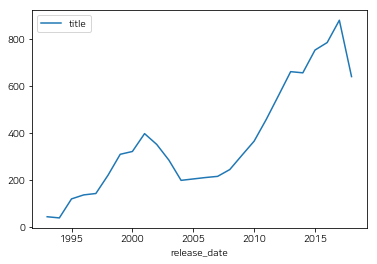

In [57]:
date.plot.line(x='release_date', y= 'title')

년도별 인기가 가장 좋았던 아이돌은 누구일까? 이를 알기 위해선 해당 년도의 곡의 인기도를 분석해보고자한다. release_date로 묶은 뒤 인기도로 sort_values를 해주자.

In [58]:
release = release[release.release_date != '-']

In [59]:
year_top = release[['title', 'artist', 'like', 'release_date']]
year_top.head()

,title,artist,like,release_date
0,latata,(여자)아이들,"85,374",2018
1,달라($$$),(여자)아이들,"4,229",2018
2,maze,(여자)아이들,"6,198",2018
3,don`ttextme,(여자)아이들,"2,950",2018
4,알고싶어,(여자)아이들,"3,384",2018


In [60]:
# 좋아요 개수가 int가 아니기 때문에 먼저 쉼표를 날리고 인트로 변경
year_top.like = year_top.like.str.replace(',', '', regex=False).astype(int)
year_top.head()

C:\Users\pje17\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,title,artist,like,release_date
0,latata,(여자)아이들,85374,2018
1,달라($$$),(여자)아이들,4229,2018
2,maze,(여자)아이들,6198,2018
3,don`ttextme,(여자)아이들,2950,2018
4,알고싶어,(여자)아이들,3384,2018


In [61]:
year_top.release_date = year_top.release_date.astype(int)
year_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9566 entries, 0 to 9565
Data columns (total 4 columns):
title           9566 non-null object
artist          9566 non-null object
like            9566 non-null int32
release_date    9566 non-null int32
dtypes: int32(2), object(2)
memory usage: 298.9+ KB


C:\Users\pje17\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [62]:
date_top = release[['title', 'artist', 'like', 'release_date']].groupby(by='release_date').apply(lambda x: x['like'].sort_values(ascending=False)).reset_index()

# apply(lambda x: x['time'].sort_values()).reset_index()

In [63]:
year_top.sort_values(by='like', ascending=False).groupby('release_date').head(1).sort_values(by='release_date', ascending=True)

# ['like'].rank(ascending=False)

,title,artist,like,release_date
3331,난알아요,서태지와 아이들,7766,1992
3345,너에게,서태지와 아이들,3475,1993
3356,널지우려해,서태지와 아이들,2764,1994
8157,나어릴적꿈,터보,9586,1995
5311,candy,에이치오티,17675,1996
5328,행복,에이치오티,17499,1997
7244,커플,젝스키스,54604,1998
45,사랑해그리고기억해,god,20420,1999
51,촛불하나,god,47076,2000
62,길,god,30987,2001


In [64]:
artist_best = year_top.sort_values(by='like', ascending=False).groupby('artist').head(1).sort_values(by='artist', ascending=True).reset_index()

In [65]:
artist_best[artist_best.artist.isin(['레드벨벳', '방탄소년단'])]

,index,title,artist,like,release_date
41,1245,빨간맛(redflavor),레드벨벳,201432,2017
68,1916,봄날,방탄소년단,355442,2017


In [66]:
# 년도별 데뷔 그룹 수

# artist_info.sort_values(by='fan', ascending=False)[['artist', 'fan']].reset_index().head(20)

artist_info.groupby('debut_y').count().artist.reset_index()

,debut_y,artist
0,1992.0,3
1,1993.0,2
2,1994.0,2
3,1995.0,2
4,1996.0,6
5,1997.0,6
6,1998.0,9
7,1999.0,11
8,2000.0,5
9,2001.0,11


### d3 시각화를 위한 전처리 및 파일 추출

In [67]:
# 멜론에서 가장 팬이 많은 가수
top30 = artist_info.sort_values(by='fan', ascending=False)[['artist', 'fan', 'gender']].reset_index().head(30)
top30

,index,artist,fan,gender
0,163,엑소,529951,남
1,197,방탄소년단,518210,남
2,92,빅뱅,305165,남
3,295,워너원,230428,남
4,229,레드벨벳,224402,여
5,234,마마무,190765,여
6,221,위너,184269,남
7,261,트와이스,179443,여
8,162,비투비,176461,남
9,113,비스트,151740,남


In [68]:
top30 = top30.drop(top30.columns[0], axis=1)

In [69]:
top30

,artist,fan,gender
0,엑소,529951,남
1,방탄소년단,518210,남
2,빅뱅,305165,남
3,워너원,230428,남
4,레드벨벳,224402,여
5,마마무,190765,여
6,위너,184269,남
7,트와이스,179443,여
8,비투비,176461,남
9,비스트,151740,남


In [70]:
# 가수별 곡 수 카운트
songs = com.copy()
songs.head(1)

,title,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,composer,arranger,artist_m,gender,idol_id,agency_old,agency_new,debut_y,debut_t,fan
0,latata,(여자)아이들,I am,2018.05.02,Dance,타이틀 곡,"85,374",소연 작사 소연 작곡 빅싼초 (Yummy Tone) 작곡 빅싼...,기나긴 너와 이 밤을<br>너와 이렇게 너와<br>기다린 너와 시간을<br>너와 이...,소연,"소연, 빅싼초 (Yummy Tone)","빅싼초 (Yummy Tone), 소연","소연, 미연, 수진, 우기, 슈화, 민니",여,2137482,NaN,큐브,2018.0,NaN,16884


In [71]:
songartist = songs.groupby(by='artist').title.count().reset_index()
songartist.head()

,artist,title
0,(여자)아이들,9
1,BP 라니아,19
2,god,103
3,갓세븐,82
4,갱키즈,7


In [72]:
top30songs = pd.merge(top30, songartist, on='artist')
top30songs

,artist,fan,gender,title
0,엑소,529951,남,69
1,방탄소년단,518210,남,113
2,빅뱅,305165,남,88
3,워너원,230428,남,15
4,레드벨벳,224402,여,65
5,마마무,190765,여,62
6,위너,184269,남,31
7,트와이스,179443,여,51
8,비투비,176461,남,95
9,비스트,151740,남,83


In [73]:
# top30 가수별 최고 인기곡은?
artist_best[artist_best.artist.isin(top30songs.artist)]

,index,title,artist,like,release_date
3,197,youare,갓세븐,56545,2017
5,253,something,걸스데이,63790,2014
17,515,여보세요,뉴이스트,125828,2013
18,544,있다면,뉴이스트 W,119209,2017
41,1245,빨간맛(redflavor),레드벨벳,201432,2017
52,1532,별이빛나는밤,마마무,144160,2018
68,1916,봄날,방탄소년단,355442,2017
85,2429,her,블락비,104188,2014
88,2482,뚜두뚜두(ddu-duddu-du),블랙핑크,188892,2018
92,2581,12시30분,비스트,107237,2014


In [74]:
# 빅스 1위 곡은 함께 부른 노래기 때문에 제외

vixx = year_top.sort_values(by='like', ascending=False).groupby('artist').head(5)

In [75]:
vixx[vixx.artist == '에프엑스']

,title,artist,like,release_date
5587,goodbyesummer(f(amber+luna+krystal)(feat.d.o.o...,에프엑스,72861,2013
5604,4walls,에프엑스,69703,2015
5581,첫사랑니(rumpumpumpum),에프엑스,58257,2013
5615,allmine,에프엑스,37223,2016
5582,미행(그림자:shadow),에프엑스,35486,2013
